In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore') #hehe

In [182]:
data = pd.read_csv("mortality_rates.csv", header =3, skipfooter= 10, engine='python') #read in CSV file, skip the first 3 columns and last 10 columns


In [183]:
data #overall data
plt.rcParams.update(plt.rcParamsDefault) #reset frame size for graphs

In [184]:
for column in data: #for each column
    if data[column].dtype == "object" and column != "Entidad federativa de registro": #check if its a string and not the first column
        data[column] = data[column].str.replace(" ","") #remove whitespace
        data[column] = data[column].astype(float) #convert to float


In [185]:
#sum each columns value
df = pd.DataFrame(data.sum()) #calculate the total sum for each column
df = df[1:] #from 1 and on
df.reset_index(inplace = True) #re-add index 
df.rename(columns={"index": "labels",0:"values"}, inplace= True)


In [186]:
Total = []
Men = []
Women = []

for i in range(10):
    Total.append(df["values"].iloc[4*i+3] + df["values"].iloc[4*i]) #add total+unspecified
    Men.append(df["values"].iloc[4*i+1]) #add Men
    Women.append(df["values"].iloc[4*i+2]) #add women


In [187]:
x = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019] #years of data


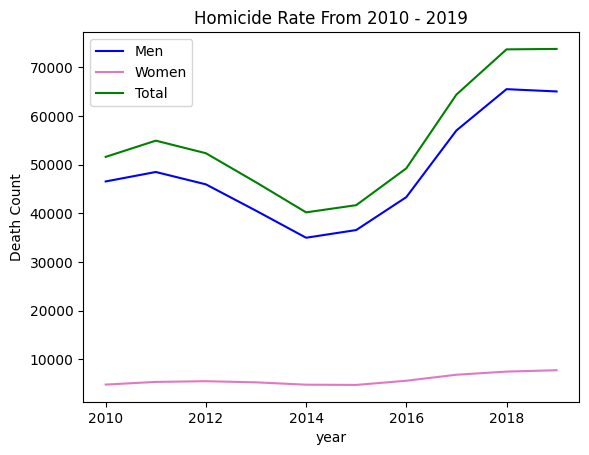

In [188]:
plt.title('Homicide Rate From 2010 - 2019')
plt.xlabel('year')
plt.ylabel('Death Count')
plt.plot(x, Men, 'b', label='Men')
plt.plot(x, Women, 'tab:pink', label='Women')
plt.plot(x, Total, 'g', label = 'Total')
plt.legend()


In [189]:
men2 = []
women2 = []
total2 = []

#percent change = (year-(year-1)/|year-1|) * 100
#ex: percent change from 2010 to 2011 = ((2011-2010)/2010) * 100

for i in range(1,10): #start from 1 because year 2010 doesn't have a percent change
    men2.append(((Men[i]-Men[i-1])/abs(Men[i-1]))*100)
    women2.append(((Women[i]-Women[i-1])/abs(Women[i-1]))*100)
    total2.append(((Total[i]-Total[i-1])/abs(Total[i-1]))*100)


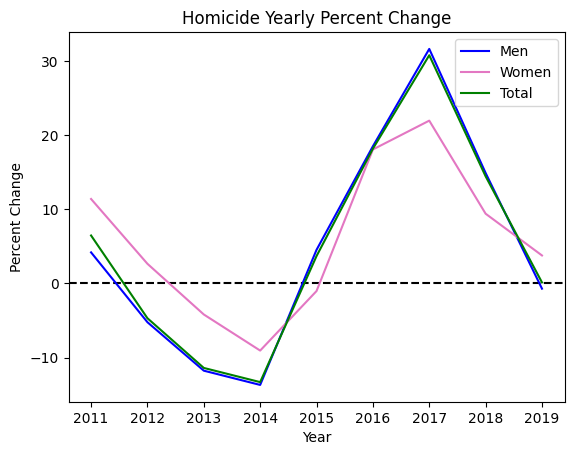

In [190]:
plt.title('Homicide Yearly Percent Change')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.axhline(y = 0, color = 'k', linestyle='--') 
plt.plot(x[1:], men2, 'b', label ='Men') #from 2011 and on
plt.plot(x[1:], women2, 'tab:pink', label='Women')
plt.plot(x[1:], total2, 'g', label='Total')
plt.legend()

In [191]:
data2 = data #copy data into secondary set
data2.drop([0], inplace = True) #get rid of the totals row
data2 #output the current data

,Entidad federativa de registro,Total,Hombres,Mujeres,No especificado,Total.1,Hombres.1,Mujeres.1,No especificado.1,Total.2,...,Mujeres.7,No especificado.7,Total.8,Hombres.8,Mujeres.8,No especificado.8,Total.9,Hombres.9,Mujeres.9,No especificado.9
1,Aguascalientes,75.0,65.0,10.0,0,82.0,69.0,13.0,0,45.0,...,8.0,0,82.0,73.0,9.0,0,120.0,108.0,11.0,1
2,Baja California,1528.0,1408.0,117.0,3,809.0,708.0,94.0,7,581.0,...,205.0,9,2912.0,2603.0,272.0,37,2823.0,2469.0,264.0,90
3,Baja California Sur,55.0,45.0,10.0,0,42.0,34.0,8.0,0,37.0,...,77.0,1,200.0,169.0,31.0,0,104.0,87.0,16.0,1
4,Campeche,48.0,39.0,9.0,0,47.0,39.0,8.0,0,80.0,...,6.0,0,79.0,65.0,14.0,0,83.0,73.0,10.0,0
5,Coahuila de Zaragoza,449.0,389.0,60.0,0,730.0,670.0,60.0,0,1160.0,...,41.0,0,244.0,214.0,30.0,0,306.0,254.0,52.0,0
6,Colima,131.0,126.0,5.0,0,163.0,145.0,17.0,1,265.0,...,77.0,4,747.0,660.0,85.0,2,830.0,726.0,103.0,1
7,Chiapas,199.0,176.0,22.0,1,186.0,160.0,24.0,2,390.0,...,66.0,0,662.0,610.0,52.0,0,619.0,548.0,71.0,0
8,Chihuahua,6407.0,5816.0,580.0,11,4500.0,4084.0,410.0,6,2772.0,...,258.0,0,2978.0,2695.0,279.0,4,2936.0,2625.0,308.0,3
9,Ciudad de México,1077.0,932.0,145.0,0,1101.0,955.0,140.0,6,1086.0,...,143.0,0,1469.0,1331.0,138.0,0,1301.0,1157.0,144.0,0
10,Durango,1109.0,1012.0,94.0,3,1063.0,899.0,59.0,105,822.0,...,28.0,0,178.0,157.0,21.0,0,175.0,152.0,23.0,0


<AxesSubplot:title={'center':'Homicides per 100,000 between 2017-2019'}, xlabel='States'>

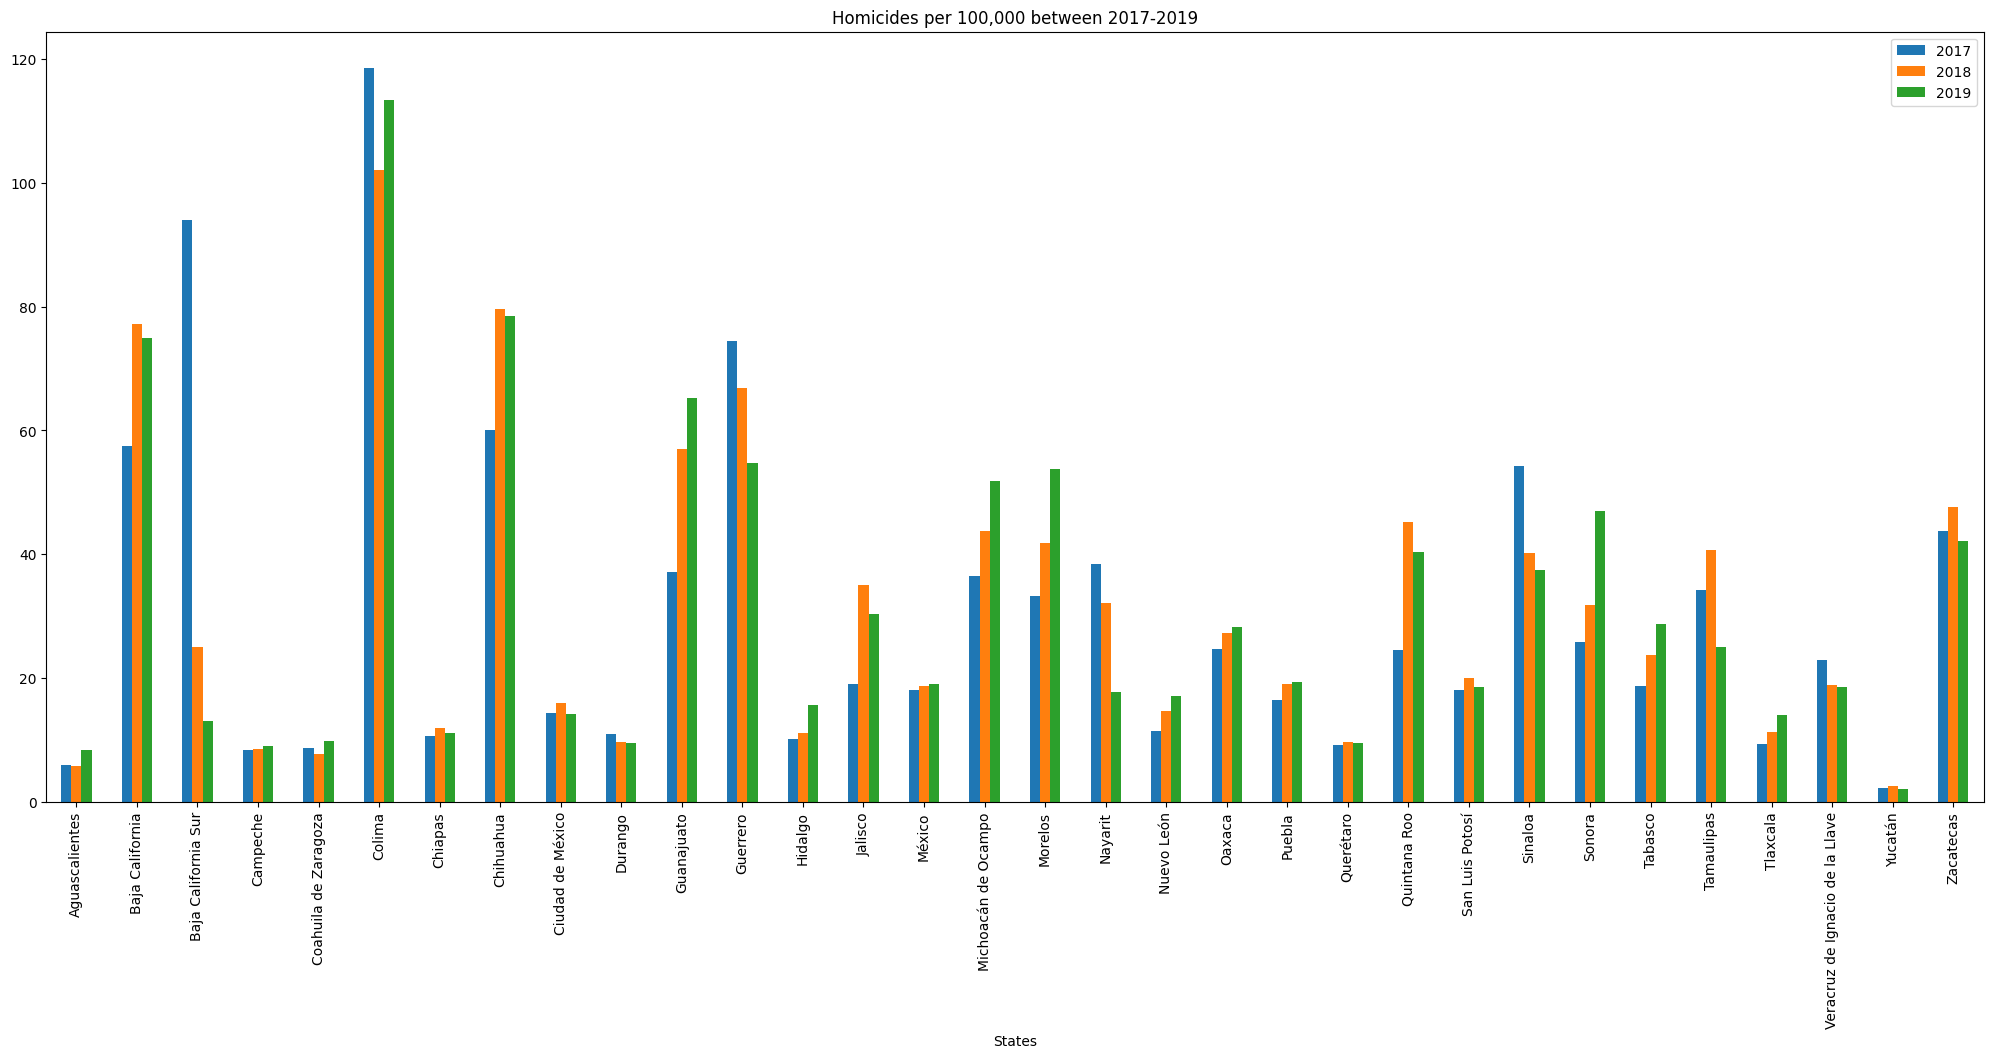

In [197]:

#Array with total population for 2020
total_pop = [1425607, 3769020, 798447, 928363, 3146771, 731391, 5543828, 3741869, 9209944, 1832650, 6166934, 3540685, 3082841, 8348151, 16992418, 4748846, 1971520, 1235456, 5784442, 4132148, 6583278,
  	    	2368467, 1857985, 2822255, 3026943, 2944840, 2402598, 3527735, 1342977, 8062579, 2320898, 1622138]


df3 = data2[['Entidad federativa de registro', 'Total.7', 'Total.8', 'Total.9']] #store just these categories into df3

#calculate the homicide rate per 100,000 for 2017,2018,2019 in all states
df3['Total.7'] = (df3['Total.7']/total_pop) * 100000 
df3['Total.8'] = (df3['Total.8']/total_pop) * 100000
df3['Total.9'] = (df3['Total.9']/total_pop) * 100000

# plot grouped bar chart 
plt.rcParams['figure.figsize'] = [25, 10]
df3.rename(columns={'Entidad federativa de registro': 'States','Total.7': '2017', 'Total.8': '2018', 'Total.9':'2019'}, inplace = True)

df3.plot(x='States', 
        kind='bar', 
        stacked=False, 
        title='Homicides per 100,000 between 2017-2019') 
